Ver ejemplos sencillos de Homogéneo. Inter arribo, condicionales, más de un tipo el proceso. 
Durret o Ross para ejemplos.

# Binomial a Poisson

### Configuración Inicial
1. **Distribución Binomial**: La distribución binomial con parámetros $ n $ (número de ensayos) y $ p $ (probabilidad de éxito en cada ensayo) tiene la siguiente función de masa de probabilidad (FMP):
   $$ P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} $$
   para $ k = 0, 1, \ldots, n $.

2. **Límite Poisson**: Queremos ver qué sucede con esta distribución cuando $ n \to \infty $ y $ p \to 0 $ de tal manera que $ np \to \lambda $, donde $ \lambda $ es una constante.

### Derivación
Para que la distribución binomial se aproxime a una distribución de Poisson, consideramos el límite mencionado. La FMP de Poisson está dada por:
$$ P(Y = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Para establecer la conexión, tomemos la FMP binomial y reescribámosla con $ \lambda = np $:
$$ P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!} \left(\frac{\lambda}{n}\right)^k \left(1-\frac{\lambda}{n}\right)^{n-k} $$


Expandamos y simplifiquemos esta expresión en el límite cuando $ n \to \infty $:
$$ \frac{n!}{(n-k)!n^k} \to 1 $$

ya que los términos adicionales en $ n! $ se cancelan con $ n^k $.

$$ \left(1-\frac{\lambda}{n}\right)^n \to e^{-\lambda} $$

 por la definición del número $ e $.

 $$ \left(1-\frac{\lambda}{n}\right)^{-k} \to 1 $$
 
  ya que $ \frac{\lambda}{n} \to 0 $ y $ k $ es finito.

Combinando estos resultados, obtenemos:
$$ \lim_{n \to \infty} P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

que es la distribución de Poisson

# Ejercicio 5

Clientes llegan a ver autos con una frecuencia de $\lambda=50$ por día. Supongamos que dividimos el día en $N$ intervalos. Entonces cada intervalo tiene longitud 

$$\delta=\frac{\text{dia}}{N}$$

para tener en promedio 50 por día, como los eventos son independientes, cada uno tiene que tener una esperanza de clientes igual a $\lambda/N$. Esto lo podemos simular con muchas distribuciones, en particular con un proceso bernoulli en el que dividimos el intervalo en el que la probabilidad de éxito está dada por $\lambda/N$. Así, supongamos que en cada intervalo tenemos una variable aleatoria Bernoulli dada por 
$$X_i\sim \text{Bern}\left(p=\frac{\lambda}{N}\right), i \in \{1,\ldots,N\}$$

Estas son variables aleatorias iid de modo que la esperanza de su suma está dada por

$$ 
\begin{align}
\mathbb{E}\left[ \sum_{i=1}^N X_i \right] &=\sum_{i=1}^N \mathbb{E}\left[ X_i \right]\\
& =N\sum_{i=1}^N \\
&=N \frac{\lambda}{N}\\
&=\lambda 
\end{align}
$$

La distribución de la suma sería la $\text{Binom}\left(\frac{\lambda}{N},N\right)$ y lo que estamos buscando es que converja a la Poisson no a la Binomial. Veremos que al aumentar el número de intervalos aproximaremos cada vez mejor la distribución de Poisson 

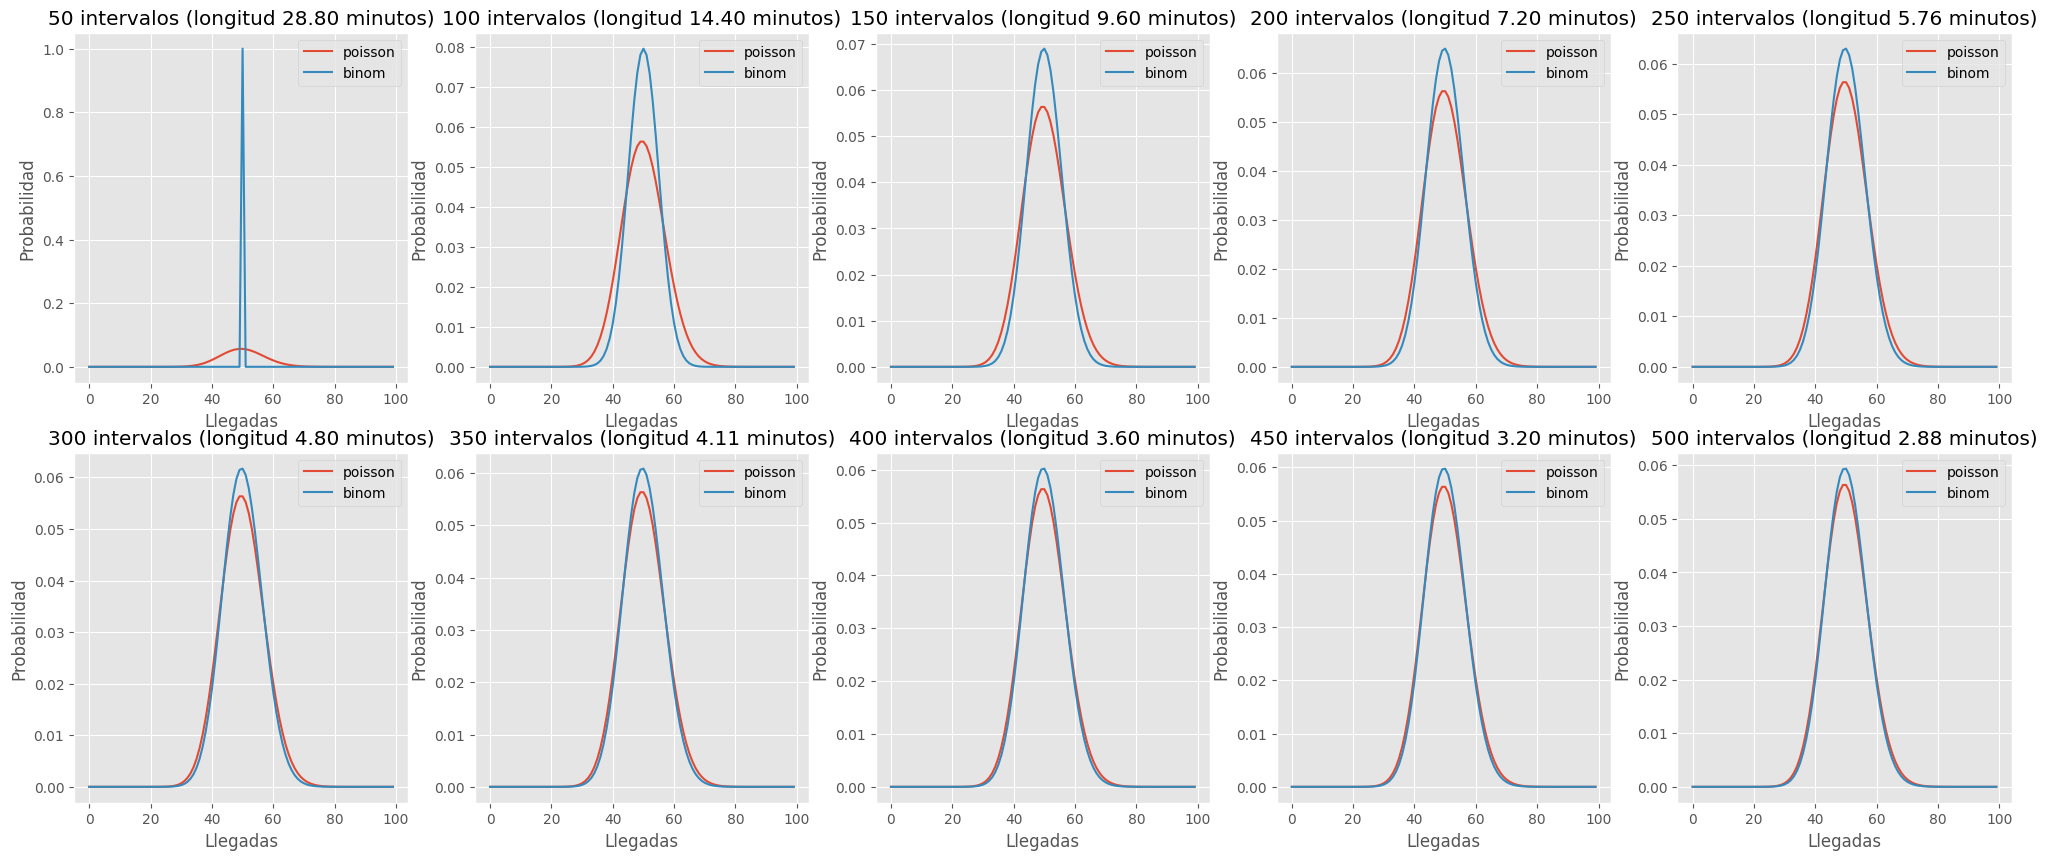

In [68]:
from math import factorial
import scipy.stats as st

start,stop=50,500
N_intervalos_lista=[int(p) for p in np.linspace(start=start,stop=stop,num=10)]

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(5*5,2*5))
lamb=50
k=np.arange(100)
for i in range(len(N_intervalos_lista)):
    binom_arreglo=st.binom(N_intervalos_lista[i],lamb/N_intervalos_lista[i]).pmf(k)
    row,col=i//5,i%5
    ax[row,col].plot(k,st.poisson(50).pmf(k=k),label='poisson')
    ax[row,col].plot(k,binom_arreglo,label='binom')
    ax[row,col].legend()
    ax[row,col].set_title(f'{N_intervalos_lista[i]} intervalos (longitud {1/N_intervalos_lista[i]*24*60:2.2f} minutos)')
    ax[row,col].set_xlabel(f'Llegadas')
    ax[row,col].set_ylabel(f'Probabilidad')
plt.show()


## Distribución conjunta

El problema dice que de 9 a 6 llegan clientes compradores con probabilidad 1/2 y de 6 a 9 llegan compradores con probabilidad 1/4.

Primero simplifiquemos el problema y veamos cuál es la distribución de eventos Poisson dentro de los que sabemos que hay un subconjunto que ocurre con cierta probabilidad $p$. 

Es decir queremos la probabilidad de que lleguen $n$ clientes compradores dado que los clientes llegan de acuerdo a una distribución de Poisson. Así, tenemos que la probabilidad va a estar dada por todos los eventos donde llegan $n$ o más clientes y que de esos $n$ o más clientes, exactamente $n$ son compradores, dado que un comprador llega con probabilidad $p$

Entonces tenemos 

$$ 
\begin{align}
\mathbb{P}\left[ Z=n \right]&=\mathbb{P}\left[\text{n } \text{clientes son compradores} |\text{lleguen } m>n \text{ clientes} \right]\\
\mathbb{P}\left[ Z=n \right]&=\mathbb{P}\left[X=n |Y=m>n \right]
\end{align}
$$

donde $X \sim \text{Binom}(p, N)$ y $Y\sim \text{Pois}(\lambda=50*t)$, con $t$ la fracción del día que nos interesa, por ejemplo para de 9 a 18 hay 9 horas entonces $t=0.5$ dias.


Entonces la distribución de masa de probabilidad para el número de clientes compradores que llegaron está dada por 

$$ 
\begin{align}
\mathbb{P}\left[ Z=n \right]&=\sum_{m>n} \mathbb{P}\left[ X=n , Y=m \right]\\

&=\sum_{m=n}^{\infty} \mathbb{P}\left[ X=n\right] \mathbb{P}\left[ Y=m \right]\\
&=\sum_{m=n}^{\infty} f_{\text{Binom(m,p)}}(n) f_{\text{Poisson}(\lambda t)}(m) \\

\end{align}
$$

donde

$$ f_{\text{Binom(m,p)}}(n) = \frac{m!}{(m-n)!n!} p^{n} (1-p)^{m-n} $$
es la pmf de la distribución binomial y 
$$f_{\text{Poisson}(\lambda t)}(m) = e^{-\lambda t}\frac{(\lambda t)^m}{m!}  $$


Desarrollando obtenemos 

$$ 
\begin{align}
\mathbb{P}\left[ Z=n \right]&=\sum_{m=n}^{\infty}\frac{m!}{(m-n)!n!} p^{n} (1-p)^{m-n} * e^{-\lambda t}\frac{(\lambda t)^m}{m!} \quad \text{cancelando el } m!\\
\mathbb{P}\left[ Z=n \right]&=\sum_{m=n}^{\infty} \frac{1}{(m-n)!n!} p^{n} (1-p)^{m-n} * e^{-\lambda t}(\lambda t)^m \quad \text{sacando de la suma los elementos que no dependen de } m\\
\mathbb{P}\left[ Z=n \right]&=\frac{e^{-\lambda t} (p \lambda t)^n}{n!} \sum_{m=n}^{\infty} \frac{((\lambda t)(1-p))^{m-n}}{(m-n)!}  \quad \text{reindexando } i=m-n\\
\mathbb{P}\left[ Z=n \right]&=\frac{e^{-\lambda t} (p \lambda t)^n}{n!} \sum_{i=0}^{\infty} \frac{((\lambda t)(1-p))^i}{i!} 
\end{align}
$$


Para simplificar llamamos $x=\lambda t(1-p)$ con lo que la suma queda como

$$  \sum_{i=0}^{\infty} \frac{x^i}{i!}=\exp(x)  $$

regresando esto a nuestra ecuación de probabilidad tenemos

$$ 
\begin{align}
\mathbb{P}\left[ Z=n \right]&=\frac{e^{-\lambda t} (p \lambda t)^n}{n!} \sum_{i=0}^{\infty} \frac{((\lambda t)(1-p))^i}{i!} \\
\mathbb{P}\left[ Z=n \right]&=\frac{e^{-\lambda t} (p \lambda t)^n}{n!} e^{\lambda t(1-p)}\\ 
\mathbb{P}\left[ Z=n \right]&=\frac{e^{-\lambda t p} (p \lambda t)^n}{n!} \\
&=f_{\text{Poisson}(\lambda t p)}(n)
\end{align}
$$

de modo que obtenemos un proceso de Poisson pero ahora la $\lambda$ se escala para incluir la selección de los eventos.

Así tenemos que para la primer parte del día, si $W$ denota los compradores que entran tenemos

$W_1\sim \text{Poisson}(\lambda t p_1)$

donde $t=9/12$ y $p_1=1/2$

Y para la segunda mitad del día tenemos
$W_1\sim \text{Poisson}(\lambda t p_2)$

donde $t=3/12$ y $p_2=1/4$


Lo que tenemos que calcular es el total de compradores en el día qu está dado por 

$$ W=W_1+W_2

## Suma de Poisson

Ahora veremos que distribución se obtiene de considerar la suma de dos Poissones

Consideremos dos variables aleatorias de Poisson independientes $ X $ y $ Y $ con parámetros $ \lambda_X $ y $ \lambda_Y $, respectivamente. Las funciones de masa de probabilidad (FMP) de $ X $ y $ Y $ están dadas por:
$$P(X = k) = \frac{e^{-\lambda_X} \lambda_X^k}{k!} $$
$$P(Y = l) = \frac{e^{-\lambda_Y} \lambda_Y^l}{l!} $$

Sea $ Z = X + Y $ la suma de $ X $ y $ Y $. Para encontrar la distribución de $ Z $, podemos usar la convolución de las dos distribuciones. Dado que $ X $ e $ Y $ son independientes, la FMP de $ Z $ es:
$$P(Z = n) = \sum_{k=0}^{n} P(X = k) P(Y = n - k) $$
$$= \sum_{k=0}^{n} \frac{e^{-\lambda_X} \lambda_X^k}{k!} \frac{e^{-\lambda_Y} \lambda_Y^{n-k}}{(n-k)!} $$

Simplificando esta expresión:
$$P(Z = n) = e^{-\lambda_X} e^{-\lambda_Y} \sum_{k=0}^{n} \frac{\lambda_X^k \lambda_Y^{n-k}}{k!(n-k)!} $$
$$= e^{-(\lambda_X + \lambda_Y)} \frac{1}{n!} \sum_{k=0}^{n} \binom{n}{k} \lambda_X^k \lambda_Y^{n-k} $$

Reconociendo la expansión binomial de $ (\lambda_X + \lambda_Y)^n $, obtenemos:
$$P(Z = n) = \frac{e^{-(\lambda_X + \lambda_Y)} (\lambda_X + \lambda_Y)^n}{n!} $$

Esta es la FMP de una distribución de Poisson con parámetro $ \lambda_Z = \lambda_X + \lambda_Y $.


Entonces la distribución de los compradores estará dada por 

$W\sim \text{Poisson}(\lambda t p_1 +\lambda t p_2) =\text{Poisson} \left( \frac{9}{12} \frac{1}{2} \lambda +\frac{3}{12} \frac{1}{4} \lambda\right)$

y sabemos que su media y varianza es la misma $\lambda$

## Inciso b

Tenemos que calcular el valor esperado de la función de ganancia dada por 

$$ G(W)=1000(W'_1+W_2)$$

donde $W'_1=W_1|W_1\geq 2$

Entonces tenemos 

$$ 
\begin{align}
\mathbb{E}\left[ G(W) \right]&=\mathbb{E}\left[ 1000(W'_1+W_2 \right]\\
&=1000\left( \mathbb{E}\left[ W'_1+ \right] + \mathbb{E}\left[  W_2 \right] \right)\\
\end{align}
$$

La segunda esperanza ya la calculamos ene l inciso previo y sabemos que está dada por

$$ \mathbb{E}\left[  W_2 \right]= \frac{3}{12}\frac{1}{4}\lambda $$

mientras que para la primer parte del día tenemos que calcular la siguiente probabilidad condicional

$$ 
\begin{align}
\mathbb{P}\left[ W'_1=w\right]&=\mathbb{P}\left[ W_1=w|W_1\geq 2 \right]\\
&=\frac{\mathbb{P}\left[ W_1=w\geq 2 \right]}{\mathbb{P}\left[ W_1 \geq 2 \right]}
\end{align}
$$
El numerador es sólo la pmf de Poisson, pero con sus dos primeros términos igualados a cero.

El denominador lo podemos calcular con su complemento

$$ \mathbb{P}\left[ W_1 \geq 2 \right]=1-\mathbb{P}\left[ W_1 <2 \right]=1-\mathbb{P}\left[ W_1 =0 \right]-\mathbb{P}\left[ W_2 =1 \right] $$

De modo que 

$$ 
\begin{align}
\mathbb{E}\left[ W'_1 \right] &= \sum_{w=2}^\infty  \frac{\mathbb{P}\left[ W_1=w\geq 2 \right]}{\mathbb{P}\left[ W_1 \geq 2 \right]} w\\
 &= \frac{1}{\mathbb{P}\left[ W_1 \geq 2 \right]}\sum_{w=2}^\infty  \mathbb{P}\left[ W_1=w\geq 2 \right] w\\
\end{align}
$$

Como sabemos que 

$$\mathbb{E}\left[ W_1 \right]=\frac{3}{12} \frac{1}{4} \lambda $$

entonces para conseguir el sumando solamente tenemos que restar los dos primeros términos, obteniendo

$$ 
\begin{align}
\mathbb{E}\left[ W'_1 \right] &= \frac{1}{\mathbb{P}\left[ W_1 \geq 2 \right]}\left( \frac{3}{12} \frac{1}{4} \lambda- 0\cdot \mathbb{P}\left[ W_1=0 \right] - 1\cdot \mathbb{P}\left[ W_1=1 \right]\right)\\
 &= \frac{1}{\mathbb{P}\left[ W_1 \geq 2 \right]}\left( \frac{3}{12} \frac{1}{4} \lambda  -\mathbb{P}\left[ W_1=1 \right]\right)\\
\end{align}
$$

donde todos los términos ya son conocidos y se puede calcular la ganancia esperada